<a href="https://colab.research.google.com/github/PilarLujan/Tesina_Diaz_Lujan/blob/main/Tesina_Lujan_Diaz_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Librarys
from keras.layers import Dense, Input
from keras.layers import Conv2D, Flatten
from keras.models import Sequential
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K
from tensorflow import keras
from sklearn.metrics import r2_score

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from numpy.random import seed
from time import time
import os

seed_number = 28
seed(seed_number)
tf.random.set_seed(seed_number)
np.random.seed(seed_number)

#Pre-procesamiento de datos



In [2]:
# Load Rain and Level Data from 18 hydrometric station over Rio Negro Basin
from google.colab import files
uploaded = files.upload()

Saving Baygorria.csv to Baygorria.csv
Saving Bonete.csv to Bonete.csv
Saving Palmar.csv to Palmar.csv


In [4]:
pal = pd.read_csv('Palmar.csv', sep=";")
pal

,Fecha,Estación,Fósforo total (µg P/L),Nitrógeno total (mg N/L),Oxigeno disuelto (mg/L),Potencial de hidrogeno (pH),Temperatura (ºC),Ch-a ug/L
0,2/6/2009,RN13F,100.0,1.01,8.32,7.200,15.1,0.15
1,22/9/2009,RN13F,151.0,0.82,9.15,7.560,15.4,0.20
2,9/6/2010,RN13F,68.0,0.80,9.48,7.430,15.1,3.80
3,12/8/2010,RN13F,95.0,0.78,9.68,7.620,10.6,NaN
4,9/12/2010,RN13F,268.0,1.20,7.25,8.360,23.5,2.50
5,7/4/2011,RN13F,67.3,0.66,8.40,7.780,21.4,20.10
6,2/6/2011,RN13F,82.3,0.54,8.00,6.930,15.3,NaN
7,26/1/2012,RN13F,370.0,1.01,6.37,7.680,25.5,3.80
8,28/3/2012,RN13F,108.0,0.50,7.06,7.230,22.4,NaN
9,22/8/2012,RN13F,109.0,0.71,8.94,7.770,14.2,2.70


In [5]:
bay = pd.read_csv('Baygorria.csv', sep=";")
bay

,Fecha,Estación,Fósforo total (µg P/L),Nitrógeno total (mg N/L),Oxigeno disuelto (mg/L),Potencial de hidrogeno (pH),Temperatura (ºC),Ch-a ug/L
0,28/05/2009,RN9F,86.4,0.690,6.21,6.97,16.9,NaN
1,17/09/2009,RN9F,54.0,0.710,8.78,7.35,15.0,1.7
2,03/06/2010,RN9F,67.0,0.595,8.63,7.34,15.2,8.3
3,06/08/2010,RN9F,74.0,0.480,10.12,7.63,9.1,0.3
4,03/12/2010,RN9F,71.3,0.650,7.48,7.36,22.7,1.9
5,01/04/2011,RN9F,68.8,0.320,8.52,7.35,21.0,0.1
6,27/05/2011,RN9F,95.1,0.850,8.14,7.64,15.0,0.3
7,19/01/2012,RN9F,78.0,0.500,7.77,7.92,25.3,8.0
8,22/03/2012,RN9F,82.9,0.510,7.31,6.90,24.5,1.2
9,16/08/2012,RN9F,92.1,0.730,9.29,7.45,14.8,0.9


In [6]:
bon = pd.read_csv('Bonete.csv', sep=";")
bon

,Fecha,Estación,Fósforo total (µg P/L),Nitrógeno total (mg N/L),Oxigeno disuelto (mg/L),Potencial de hidrogeno (pH),Temperatura (ºC),Ch-a um/L
0,27/05/2009,RN5F,75.0,0.71,8.26,6.22,16.36,0.3
1,16/09/2009,RN5F,110.0,0.62,8.36,7.40,15.50,0.6
2,03/06/2010,RN5F,75.0,0.64,8.35,7.20,15.00,7.8
3,05/08/2010,RN5F,80.0,0.66,10.94,8.20,9.30,1.3
4,02/12/2010,RN5F,67.3,0.96,7.62,7.30,22.90,11.1
5,31/03/2011,RN5F,58.3,0.33,7.97,7.22,20.50,30.8
6,26/05/2011,RN5F,70.6,0.65,8.43,7.62,16.20,0.3
7,19/01/2012,RN5F,120.0,0.96,6.93,8.53,25.70,2.2
8,21/03/2012,RN5F,114.0,0.48,7.55,7.13,24.80,1.6
9,15/08/2012,RN5F,73.6,0.63,9.34,7.53,13.90,179.0


In [7]:
pal['Fecha']=pd.to_datetime(pal['Fecha'], format="%d/%m/%Y").dt.date
# set the Date column be the index of our dataset
pal= pal.set_index('Fecha')
# now check the data shape
pal.shape

(42, 7)

In [8]:
bon['Fecha']=pd.to_datetime(bon['Fecha'], format="%d/%m/%Y").dt.date
# set the Date column be the index of our dataset
bon= bon.set_index('Fecha')
# now check the data shape
bon.shape

(40, 7)

In [9]:
bay['Fecha']=pd.to_datetime(bay['Fecha'], format="%d/%m/%Y").dt.date
# set the Date column be the index of our dataset
bay= bay.set_index('Fecha')
# now check the data shape
bay.shape

(40, 7)

In [10]:
pal


,Estación,Fósforo total (µg P/L),Nitrógeno total (mg N/L),Oxigeno disuelto (mg/L),Potencial de hidrogeno (pH),Temperatura (ºC),Ch-a ug/L
Fecha,,,,,,,
2009-06-02,RN13F,100.0,1.01,8.32,7.200,15.1,0.15
2009-09-22,RN13F,151.0,0.82,9.15,7.560,15.4,0.20
2010-06-09,RN13F,68.0,0.80,9.48,7.430,15.1,3.80
2010-08-12,RN13F,95.0,0.78,9.68,7.620,10.6,NaN
2010-12-09,RN13F,268.0,1.20,7.25,8.360,23.5,2.50
2011-04-07,RN13F,67.3,0.66,8.40,7.780,21.4,20.10
2011-06-02,RN13F,82.3,0.54,8.00,6.930,15.3,NaN
2012-01-26,RN13F,370.0,1.01,6.37,7.680,25.5,3.80
2012-03-28,RN13F,108.0,0.50,7.06,7.230,22.4,NaN


In [11]:
pal = pal.interpolate(option='spline')
pal

,Estación,Fósforo total (µg P/L),Nitrógeno total (mg N/L),Oxigeno disuelto (mg/L),Potencial de hidrogeno (pH),Temperatura (ºC),Ch-a ug/L
Fecha,,,,,,,
2009-06-02,RN13F,100.0,1.01,8.32,7.200,15.1,0.150000
2009-09-22,RN13F,151.0,0.82,9.15,7.560,15.4,0.200000
2010-06-09,RN13F,68.0,0.80,9.48,7.430,15.1,3.800000
2010-08-12,RN13F,95.0,0.78,9.68,7.620,10.6,3.150000
2010-12-09,RN13F,268.0,1.20,7.25,8.360,23.5,2.500000
2011-04-07,RN13F,67.3,0.66,8.40,7.780,21.4,20.100000
2011-06-02,RN13F,82.3,0.54,8.00,6.930,15.3,11.950000
2012-01-26,RN13F,370.0,1.01,6.37,7.680,25.5,3.800000
2012-03-28,RN13F,108.0,0.50,7.06,7.230,22.4,3.250000


In [12]:
bay = bay.interpolate(option='spline')
bay

,Estación,Fósforo total (µg P/L),Nitrógeno total (mg N/L),Oxigeno disuelto (mg/L),Potencial de hidrogeno (pH),Temperatura (ºC),Ch-a ug/L
Fecha,,,,,,,
2009-05-28,RN9F,86.4,0.690,6.21,6.97,16.9,NaN
2009-09-17,RN9F,54.0,0.710,8.78,7.35,15.0,1.700
2010-06-03,RN9F,67.0,0.595,8.63,7.34,15.2,8.300
2010-08-06,RN9F,74.0,0.480,10.12,7.63,9.1,0.300
2010-12-03,RN9F,71.3,0.650,7.48,7.36,22.7,1.900
2011-04-01,RN9F,68.8,0.320,8.52,7.35,21.0,0.100
2011-05-27,RN9F,95.1,0.850,8.14,7.64,15.0,0.300
2012-01-19,RN9F,78.0,0.500,7.77,7.92,25.3,8.000
2012-03-22,RN9F,82.9,0.510,7.31,6.90,24.5,1.200


In [13]:
bon=bon.interpolate(option='spline')
bon

,Estación,Fósforo total (µg P/L),Nitrógeno total (mg N/L),Oxigeno disuelto (mg/L),Potencial de hidrogeno (pH),Temperatura (ºC),Ch-a um/L
Fecha,,,,,,,
2009-05-27,RN5F,75.0,0.71,8.26,6.22,16.36,0.300
2009-09-16,RN5F,110.0,0.62,8.36,7.40,15.50,0.600
2010-06-03,RN5F,75.0,0.64,8.35,7.20,15.00,7.800
2010-08-05,RN5F,80.0,0.66,10.94,8.20,9.30,1.300
2010-12-02,RN5F,67.3,0.96,7.62,7.30,22.90,11.100
2011-03-31,RN5F,58.3,0.33,7.97,7.22,20.50,30.800
2011-05-26,RN5F,70.6,0.65,8.43,7.62,16.20,0.300
2012-01-19,RN5F,120.0,0.96,6.93,8.53,25.70,2.200
2012-03-21,RN5F,114.0,0.48,7.55,7.13,24.80,1.600


In [ ]:
bon.to_csv('Bonete_completo.csv')

In [ ]:
bay.to_csv('Baygorria_completo.csv')

In [ ]:
pal.to_csv('Palmar_completo.csv')

## Analisis Exploratorio de los datos

In [14]:
from google.colab import files
uploaded = files.upload()

Saving Datos_Tesina_completo.csv to Datos_Tesina_completo.csv


In [15]:
datos = pd.read_csv('Datos_Tesina_completo.csv')

In [16]:
datos = datos.sort_values(["Fecha"])

In [17]:
datos

,Fecha,Estación,Fósforo total (µg P/L),Nitrógeno total (mg N/L),Oxigeno disuelto (mg/L),Potencial de hidrogeno (pH),Temperatura (ºC),Chl-a (ug/L)
40,2009-05-27,RN5F,75.0,0.71,8.26,6.22,16.36,0.30
0,2009-05-28,RN9F,86.4,0.69,6.21,6.97,16.90,1.40
80,2009-06-02,RN13F,100.0,1.01,8.32,7.20,15.10,0.15
41,2009-09-16,RN5F,110.0,0.62,8.36,7.40,15.50,0.60
1,2009-09-17,RN9F,54.0,0.71,8.78,7.35,15.00,1.70
...,...,...,...,...,...,...,...,...
39,2022-01-20,RN9F,160.0,1.12,9.80,6.92,13.20,2.20
119,2022-01-25,RN13F,100.0,0.78,7.32,8.24,27.80,3.70
120,2022-05-03,RN13F,160.0,0.64,9.27,7.84,18.90,19.00
79,2022-08-03,RN5F,160.0,1.12,9.80,6.92,13.20,3.70


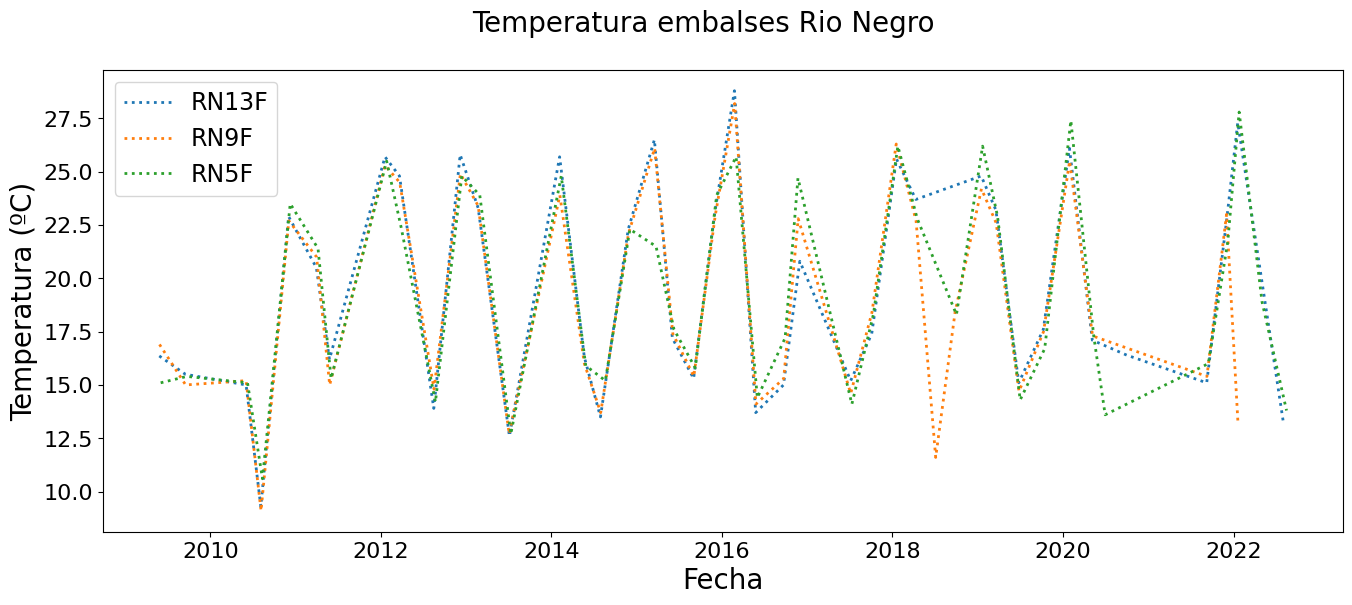

In [18]:
# set the size of our plot
fig,(ax1) = plt.subplots(1,1, figsize=(16, 6))

#plt.rcParams['figure.figsize']=(15,7)
# plots our series
plt.plot(bon['Temperatura (ºC)'], linestyle=":", linewidth=2.0, label='RN13F')
plt.plot(bay['Temperatura (ºC)'], linestyle=":", linewidth=2.0, label='RN9F')
plt.plot(pal['Temperatura (ºC)'], linestyle=":", linewidth=2.0, label='RN5F')
plt.legend(fontsize=17)
plt.tick_params(labelsize=16)
# adds title to our time series plot

plt.suptitle('Temperatura embalses Rio Negro', fontsize=20)
ax1.set_ylabel('Temperatura (ºC)', fontsize=20)
ax1.set_xlabel('Fecha',fontsize=20)
# print the plot
plt.show()

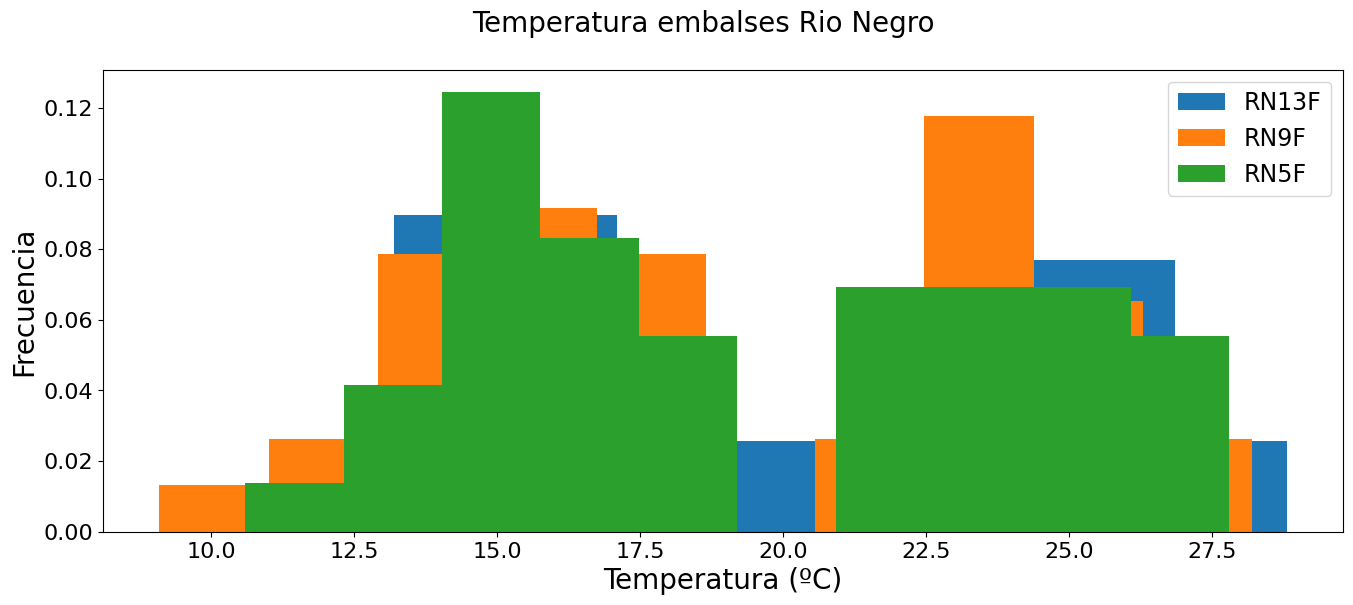

In [19]:
# set the size of our plot
fig,(ax1) = plt.subplots(1,1, figsize=(16, 6))

#plt.rcParams['figure.figsize']=(15,7)
# plots our series
plt.hist(bon['Temperatura (ºC)'], density = 1, linestyle=":", linewidth=2.0, label='RN13F')
plt.hist(bay['Temperatura (ºC)'], density = 1, linestyle=":", linewidth=2.0, label='RN9F')
plt.hist(pal['Temperatura (ºC)'], density = 1, linestyle=":", linewidth=2.0, label='RN5F')
plt.legend(fontsize=17)
plt.tick_params(labelsize=16)
# adds title to our time series plot

plt.suptitle('Temperatura embalses Rio Negro', fontsize=20)
ax1.set_ylabel('Frecuencia', fontsize=20)
ax1.set_xlabel('Temperatura (ºC)',fontsize=20)
# print the plot
plt.show()

In [ ]:
# # set the size of our plot
# fig,(ax1) = plt.subplots(1,1, figsize=(16, 6))

# #plt.rcParams['figure.figsize']=(15,7)
# # plots our series
# plt.boxplot(bon['Temperatura (ºC)'])
# plt.boxplot(bay['Temperatura (ºC)'])
# plt.boxplot(pal['Temperatura (ºC)'])
# plt.legend(fontsize=17)
# plt.tick_params(labelsize=16)
# # adds title to our time series plot

# plt.suptitle('Temperatura embalses Rio Negro', fontsize=20)
# ax1.set_ylabel('Frecuencia', fontsize=20)
# ax1.set_xlabel('Temperatura (ºC)',fontsize=20)
# # print the plot
# plt.show()

Text(0.5, 0, 'Estación')

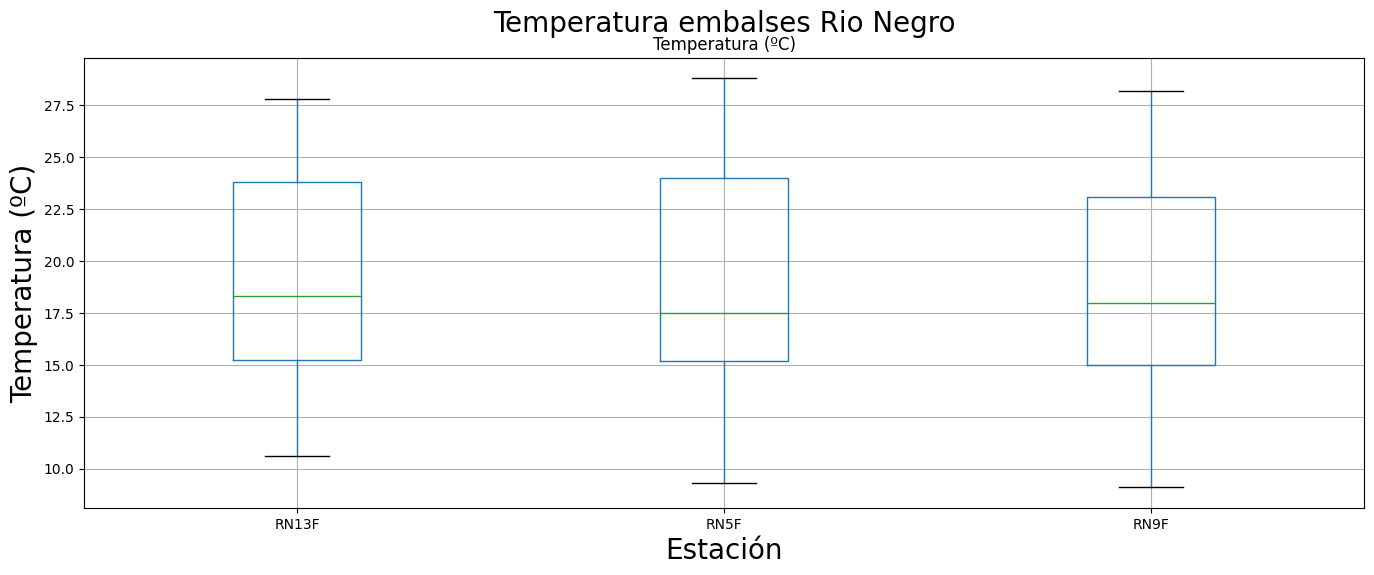

In [20]:
bT=datos.boxplot(column=['Temperatura (ºC)'], by=['Estación'], figsize=(16, 6))
plt.suptitle('Temperatura embalses Rio Negro', fontsize=20)
plt.ylabel('Temperatura (ºC)',fontsize=20)
plt.xlabel('Estación',fontsize=20)

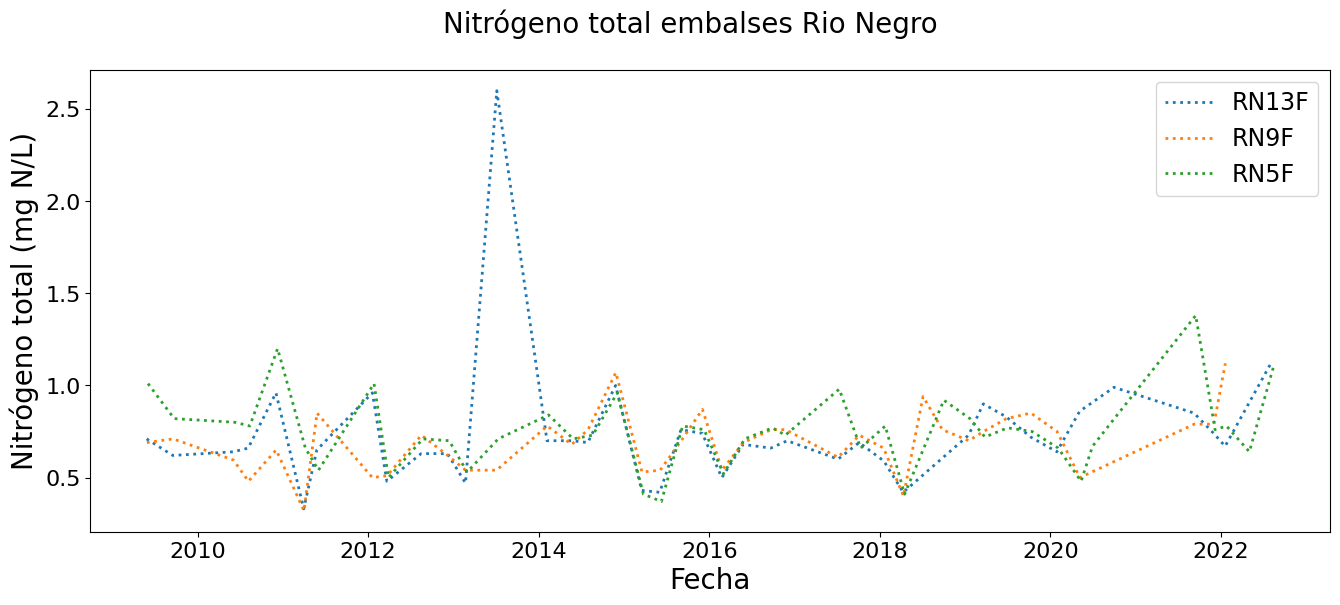

In [21]:
# set the size of our plot
fig,(ax1) = plt.subplots(1,1, figsize=(16, 6))

#plt.rcParams['figure.figsize']=(15,7)
# plots our series
plt.plot(bon['Nitrógeno total (mg N/L)'], linestyle=":", linewidth=2.0, label='RN13F')
plt.plot(bay['Nitrógeno total (mg N/L)'], linestyle=":", linewidth=2.0, label='RN9F')
plt.plot(pal['Nitrógeno total (mg N/L)'], linestyle=":", linewidth=2.0, label='RN5F')
plt.legend(fontsize=17)
plt.tick_params(labelsize=16)
# adds title to our time series plot

plt.suptitle('Nitrógeno total embalses Rio Negro', fontsize=20)
ax1.set_ylabel('Nitrógeno total (mg N/L)', fontsize=20)
ax1.set_xlabel('Fecha',fontsize=20)
# print the plot
plt.show()

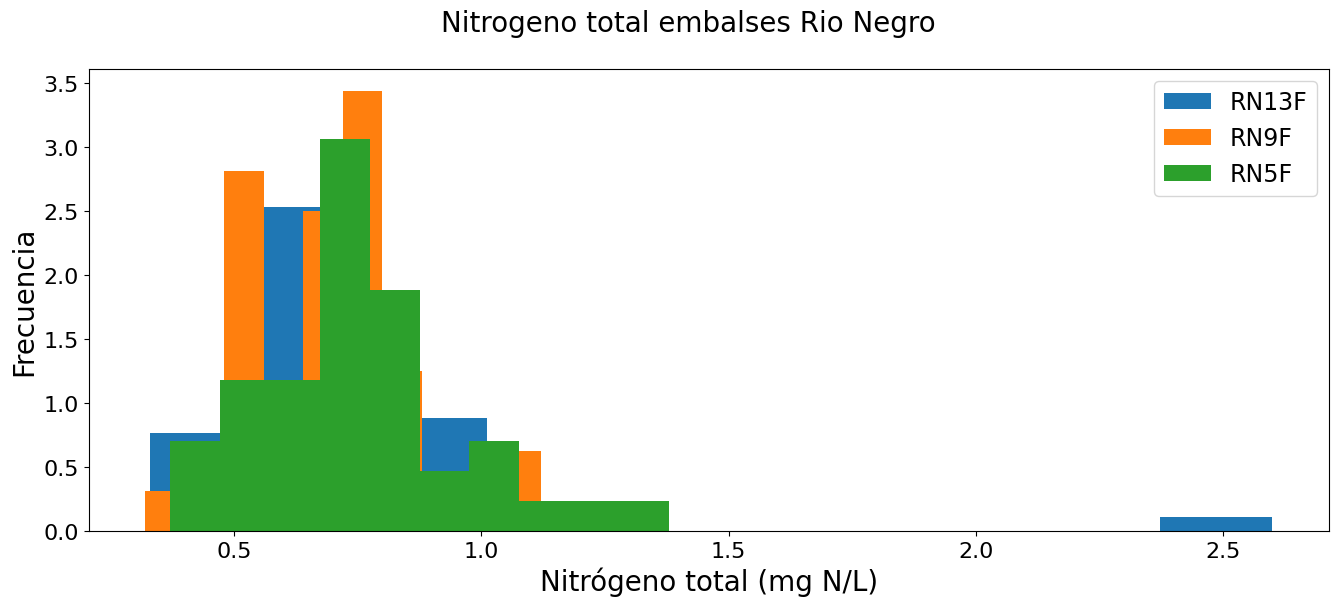

In [22]:
# set the size of our plot
fig,(ax1) = plt.subplots(1,1, figsize=(16, 6))

#plt.rcParams['figure.figsize']=(15,7)
# plots our series
plt.hist(bon['Nitrógeno total (mg N/L)'], density = 1, linestyle=":", linewidth=2.0, label='RN13F')
plt.hist(bay['Nitrógeno total (mg N/L)'], density = 1, linestyle=":", linewidth=2.0, label='RN9F')
plt.hist(pal['Nitrógeno total (mg N/L)'], density = 1, linestyle=":", linewidth=2.0, label='RN5F')
plt.legend(fontsize=17)
plt.tick_params(labelsize=16)
# adds title to our time series plot

plt.suptitle('Nitrogeno total embalses Rio Negro', fontsize=20)
ax1.set_ylabel('Frecuencia', fontsize=20)
ax1.set_xlabel('Nitrógeno total (mg N/L)',fontsize=20)
# print the plot
plt.show()

Text(0.5, 0, 'Estación')

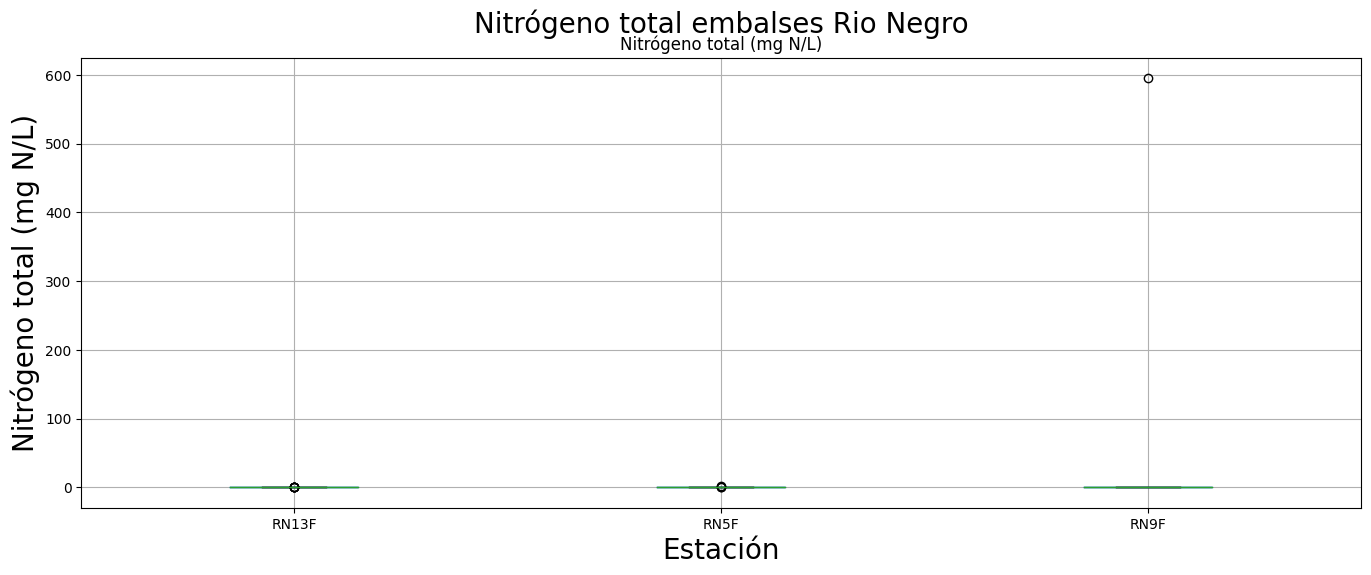

In [24]:
bT=datos.boxplot(column=['Nitrógeno total (mg N/L)'], by=['Estación'], figsize=(16, 6))
plt.suptitle('Nitrógeno total embalses Rio Negro', fontsize=20)
plt.ylabel('Nitrógeno total (mg N/L)',fontsize=20)
plt.xlabel('Estación',fontsize=20)

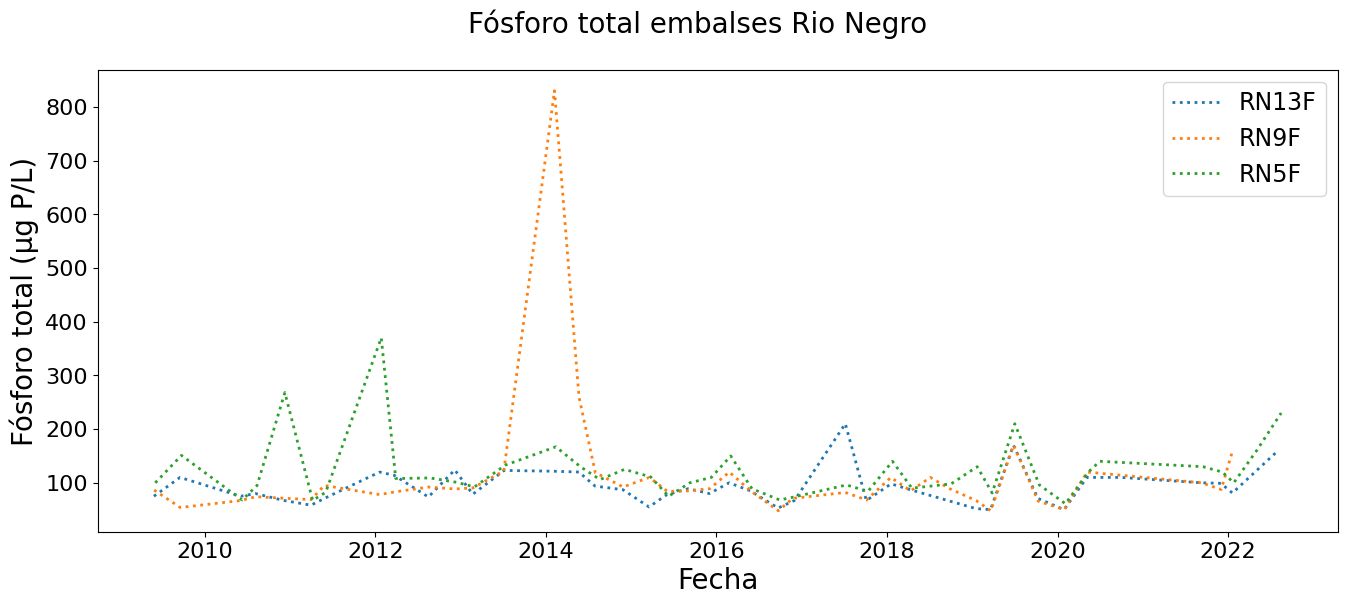

In [25]:
# set the size of our plot
fig,(ax1) = plt.subplots(1,1, figsize=(16, 6))

#plt.rcParams['figure.figsize']=(15,7)
# plots our series
plt.plot(bon['Fósforo total (µg P/L)'], linestyle=":", linewidth=2.0, label='RN13F')
plt.plot(bay['Fósforo total (µg P/L)'], linestyle=":", linewidth=2.0, label='RN9F')
plt.plot(pal['Fósforo total (µg P/L)'], linestyle=":", linewidth=2.0, label='RN5F')
plt.legend(fontsize=17)
plt.tick_params(labelsize=16)
# adds title to our time series plot

plt.suptitle('Fósforo total embalses Rio Negro', fontsize=20)
ax1.set_ylabel('Fósforo total (µg P/L)', fontsize=20)
ax1.set_xlabel('Fecha',fontsize=20)
# print the plot
plt.show()

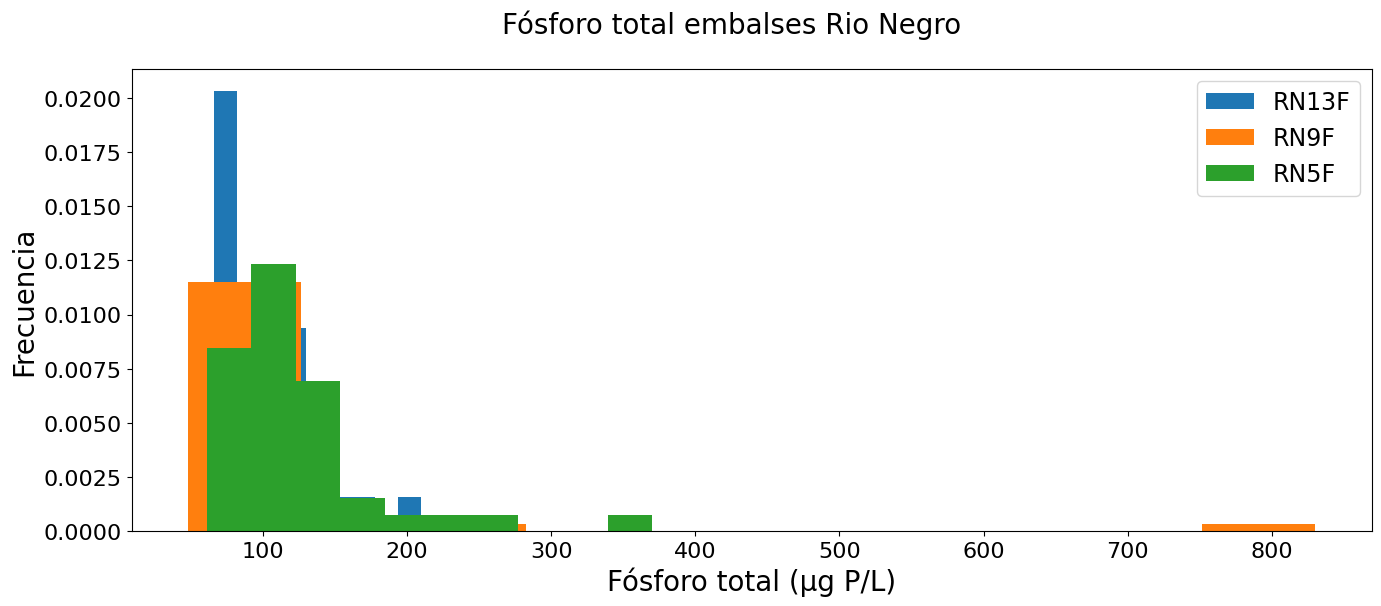

In [26]:
# set the size of our plot
fig,(ax1) = plt.subplots(1,1, figsize=(16, 6))

#plt.rcParams['figure.figsize']=(15,7)
# plots our series
plt.hist(bon['Fósforo total (µg P/L)'], density = 1, linestyle=":", linewidth=2.0, label='RN13F')
plt.hist(bay['Fósforo total (µg P/L)'], density = 1, linestyle=":", linewidth=2.0, label='RN9F')
plt.hist(pal['Fósforo total (µg P/L)'], density = 1, linestyle=":", linewidth=2.0, label='RN5F')
plt.legend(fontsize=17)
plt.tick_params(labelsize=16)
# adds title to our time series plot

plt.suptitle('Fósforo total embalses Rio Negro', fontsize=20)
ax1.set_ylabel('Frecuencia', fontsize=20)
ax1.set_xlabel('Fósforo total (µg P/L)',fontsize=20)
# print the plot
plt.show()

Text(0.5, 0, 'Estación')

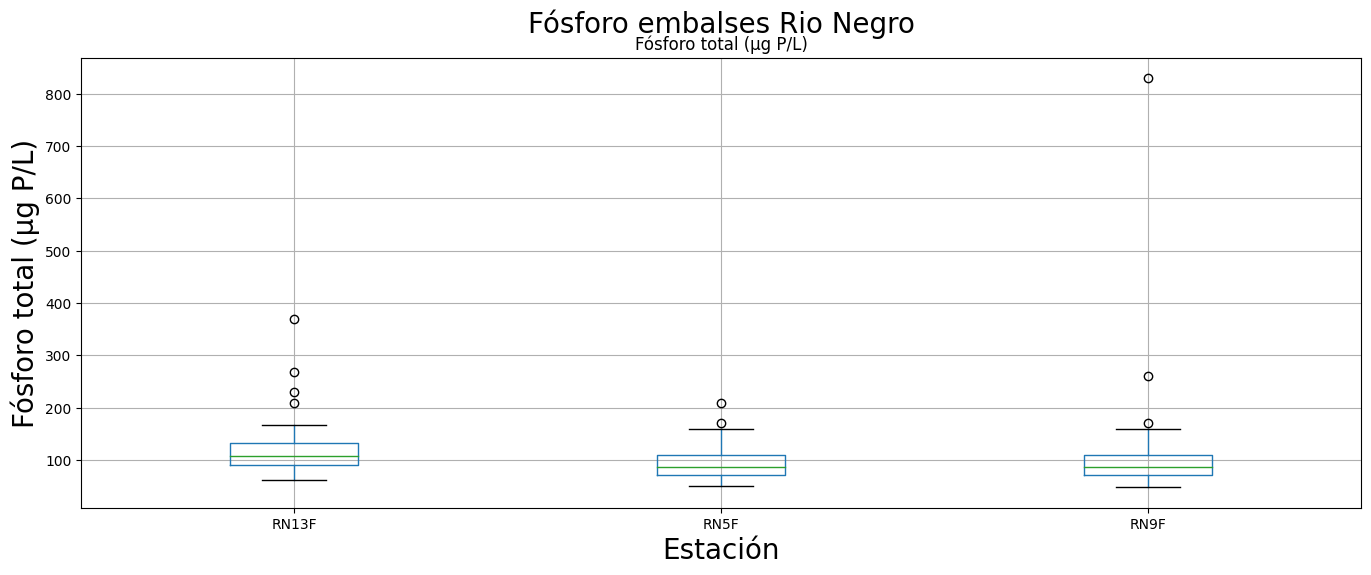

In [27]:
bT=datos.boxplot(column=['Fósforo total (µg P/L)'], by=['Estación'], figsize=(16, 6))
plt.suptitle('Fósforo embalses Rio Negro', fontsize=20)
plt.ylabel('Fósforo total (µg P/L)',fontsize=20)
plt.xlabel('Estación',fontsize=20)

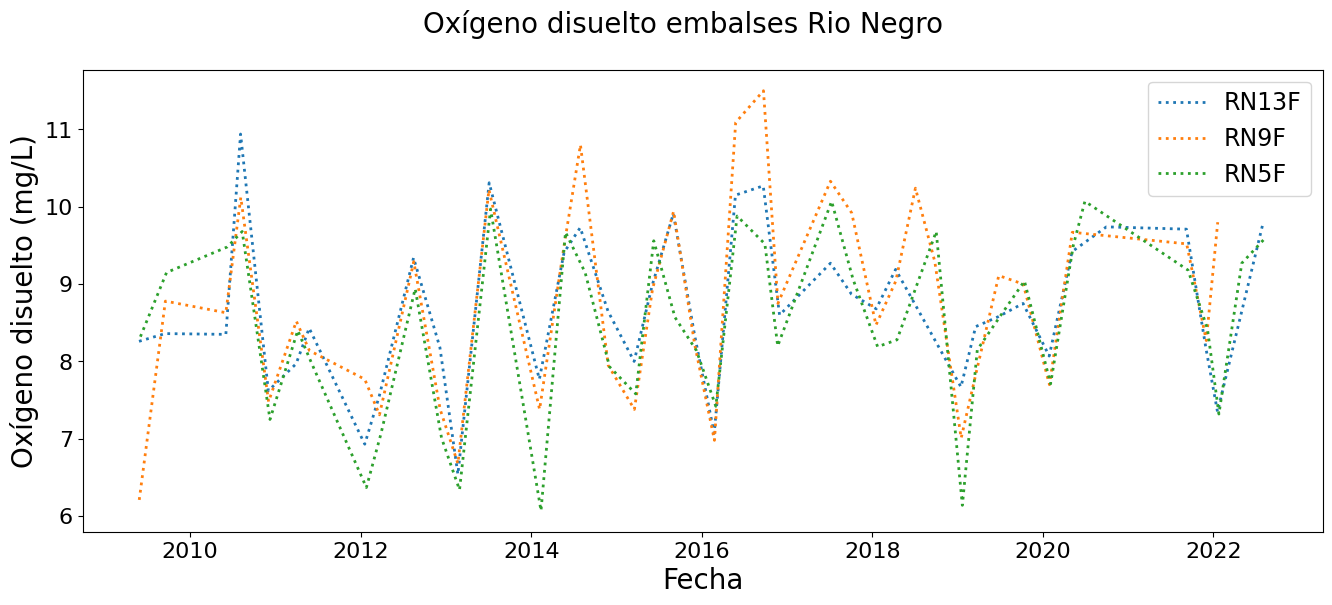

In [28]:
# set the size of our plot
fig,(ax1) = plt.subplots(1,1, figsize=(16, 6))

#plt.rcParams['figure.figsize']=(15,7)
# plots our series
plt.plot(bon['Oxigeno disuelto (mg/L)'], linestyle=":", linewidth=2.0, label='RN13F')
plt.plot(bay['Oxigeno disuelto (mg/L)'], linestyle=":", linewidth=2.0, label='RN9F')
plt.plot(pal['Oxigeno disuelto (mg/L)'], linestyle=":", linewidth=2.0, label='RN5F')
plt.legend(fontsize=17)
plt.tick_params(labelsize=16)
# adds title to our time series plot

plt.suptitle('Oxígeno disuelto embalses Rio Negro', fontsize=20)
ax1.set_ylabel('Oxígeno disuelto (mg/L)', fontsize=20)
ax1.set_xlabel('Fecha',fontsize=20)
# print the plot
plt.show()

#'Oxigeno disuelto (mg/L)',
 #      'Potencial de hidrogeno (pH) '

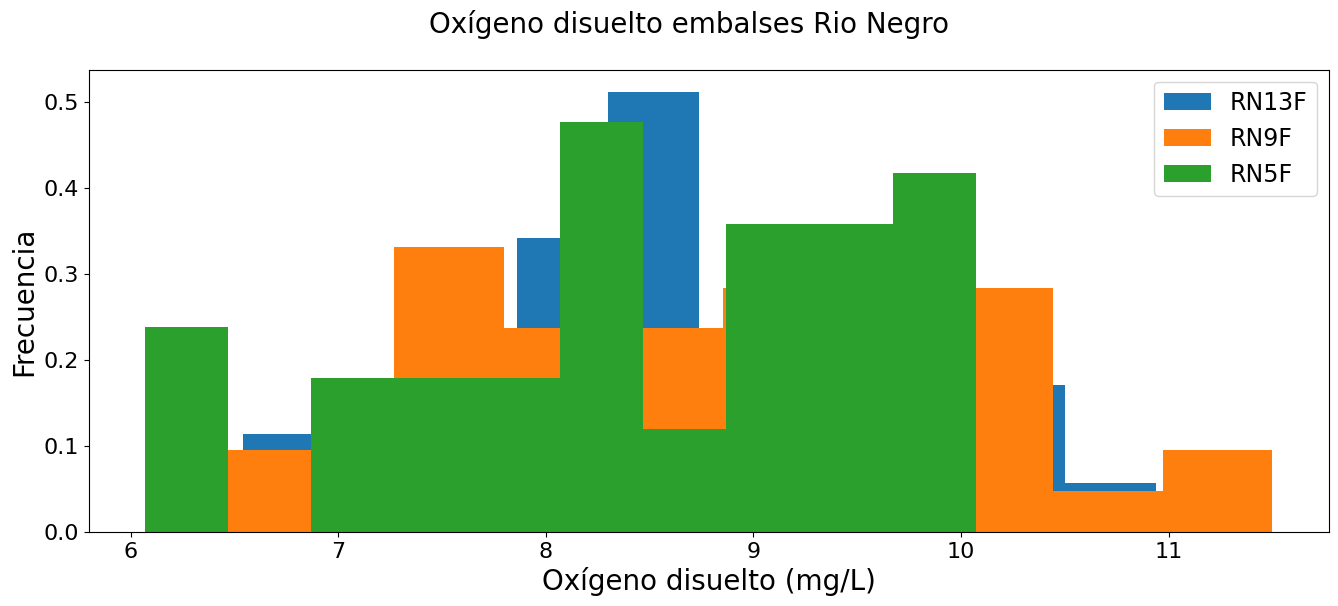

In [29]:
# set the size of our plot
fig,(ax1) = plt.subplots(1,1, figsize=(16, 6))

#plt.rcParams['figure.figsize']=(15,7)
# plots our series
plt.hist(bon['Oxigeno disuelto (mg/L)'], density = 1, linestyle=":", linewidth=2.0, label='RN13F')
plt.hist(bay['Oxigeno disuelto (mg/L)'], density = 1, linestyle=":", linewidth=2.0, label='RN9F')
plt.hist(pal['Oxigeno disuelto (mg/L)'], density = 1, linestyle=":", linewidth=2.0, label='RN5F')
plt.legend(fontsize=17)
plt.tick_params(labelsize=16)
# adds title to our time series plot

plt.suptitle('Oxígeno disuelto embalses Rio Negro', fontsize=20)
ax1.set_ylabel('Frecuencia', fontsize=20)
ax1.set_xlabel('Oxígeno disuelto (mg/L)',fontsize=20)
# print the plot
plt.show()

Text(0.5, 0, 'Estación')

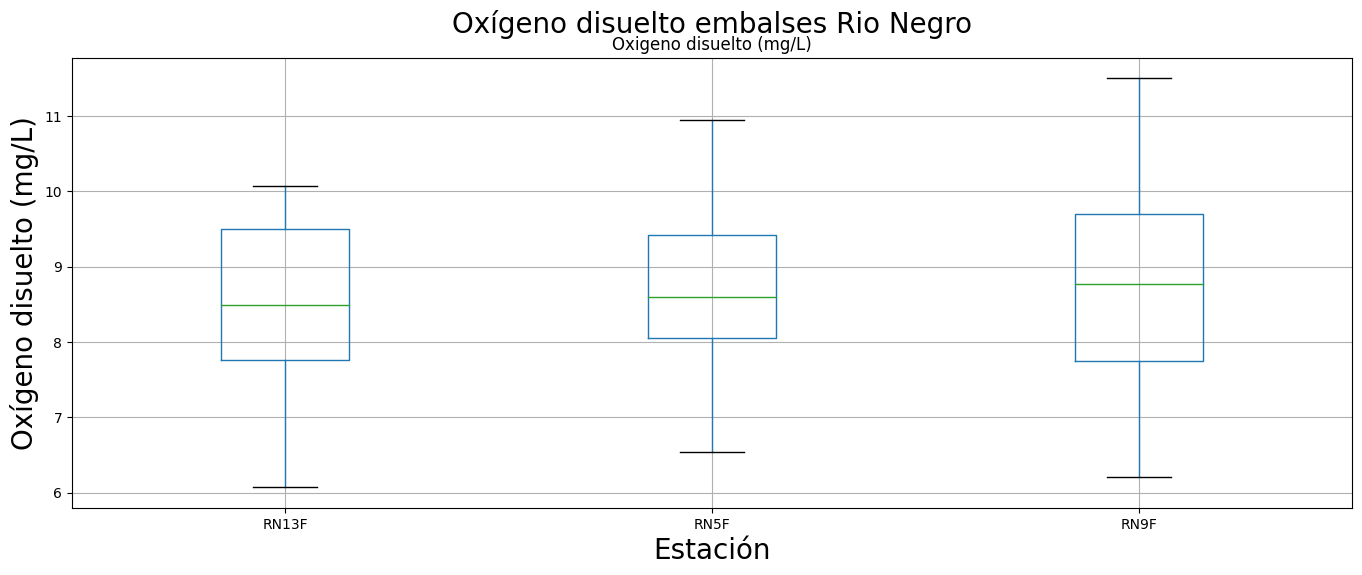

In [31]:
bT=datos.boxplot(column=['Oxigeno disuelto (mg/L)'], by=['Estación'], figsize=(16, 6))
plt.suptitle('Oxígeno disuelto embalses Rio Negro', fontsize=20)
plt.ylabel('Oxígeno disuelto (mg/L)',fontsize=20)
plt.xlabel('Estación',fontsize=20)

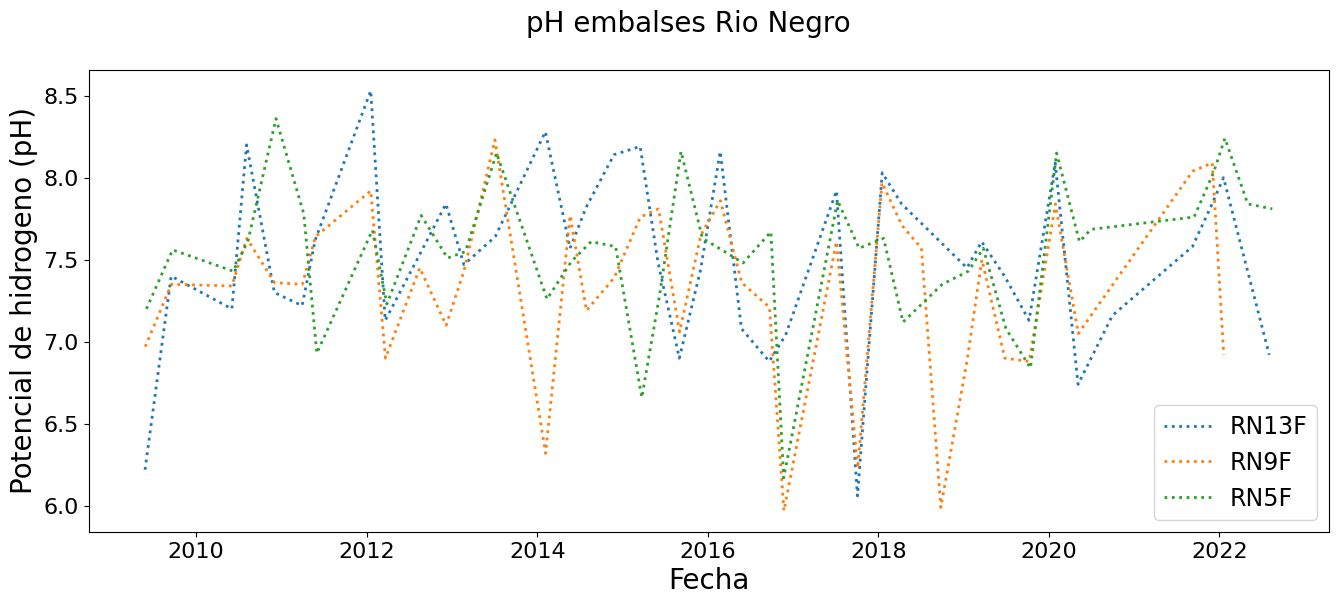

In [32]:
# set the size of our plot
fig,(ax1) = plt.subplots(1,1, figsize=(16, 6))

#plt.rcParams['figure.figsize']=(15,7)
# plots our series
plt.plot(bon['Potencial de hidrogeno (pH) '], linestyle=":", linewidth=2.0, label='RN13F')
plt.plot(bay['Potencial de hidrogeno (pH) '], linestyle=":", linewidth=2.0, label='RN9F')
plt.plot(pal['Potencial de hidrogeno (pH) '], linestyle=":", linewidth=2.0, label='RN5F')
plt.legend(fontsize=17)
plt.tick_params(labelsize=16)
# adds title to our time series plot

plt.suptitle('pH embalses Rio Negro', fontsize=20)
ax1.set_ylabel('Potencial de hidrogeno (pH)', fontsize=20)
ax1.set_xlabel('Fecha',fontsize=20)
# print the plot
plt.show()



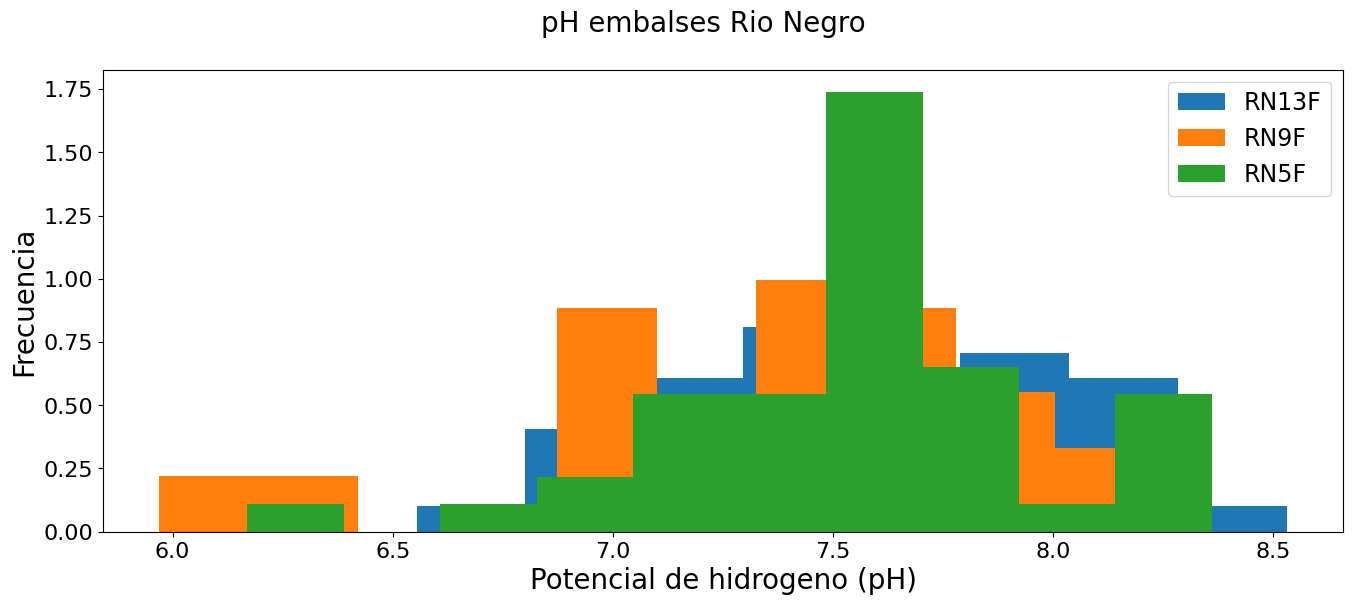

In [33]:
# set the size of our plot
fig,(ax1) = plt.subplots(1,1, figsize=(16, 6))

#plt.rcParams['figure.figsize']=(15,7)
# plots our series
plt.hist(bon['Potencial de hidrogeno (pH) '], density = 1, linestyle=":", linewidth=2.0, label='RN13F')
plt.hist(bay['Potencial de hidrogeno (pH) '], density = 1, linestyle=":", linewidth=2.0, label='RN9F')
plt.hist(pal['Potencial de hidrogeno (pH) '], density = 1, linestyle=":", linewidth=2.0, label='RN5F')
plt.legend(fontsize=17)
plt.tick_params(labelsize=16)
# adds title to our time series plot

plt.suptitle('pH embalses Rio Negro', fontsize=20)
ax1.set_ylabel('Frecuencia', fontsize=20)
ax1.set_xlabel('Potencial de hidrogeno (pH)',fontsize=20)
# print the plot
plt.show()

Text(0.5, 0, 'Estación')

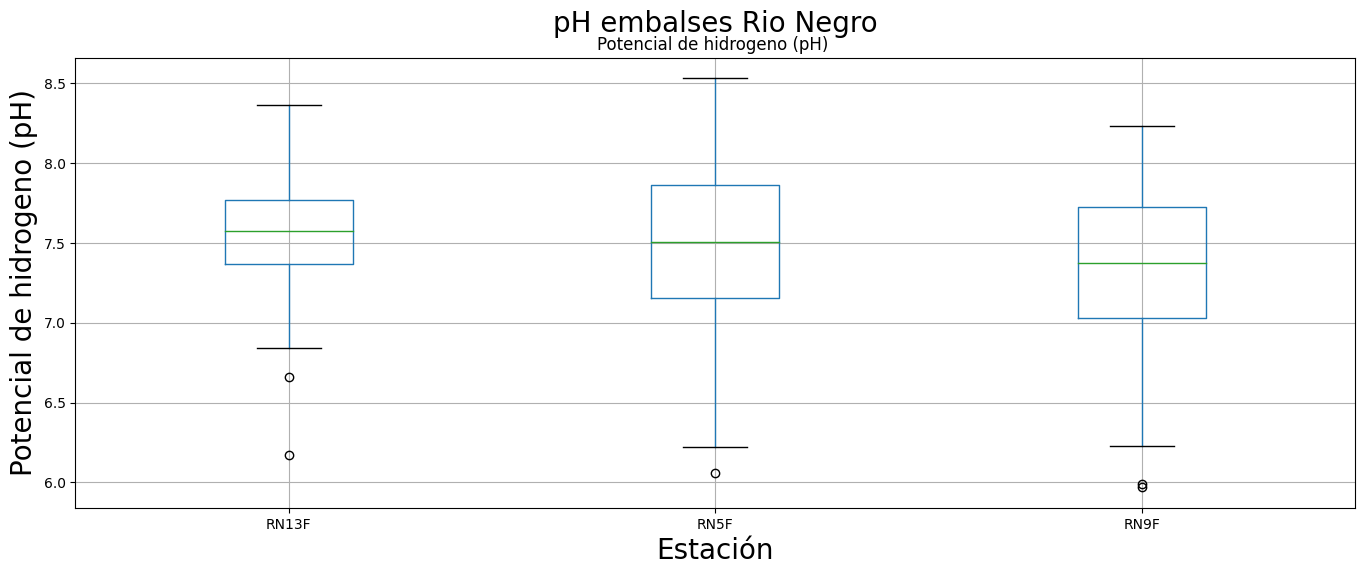

In [34]:
bT=datos.boxplot(column=['Potencial de hidrogeno (pH) '], by=['Estación'], figsize=(16, 6))
plt.suptitle('pH embalses Rio Negro', fontsize=20)
plt.ylabel('Potencial de hidrogeno (pH)',fontsize=20)
plt.xlabel('Estación',fontsize=20)

In [35]:
#1.4 Realizar una mapa de correlación
corr_matrix = datos.corr(method='pearson')
corr_matrix

<ipython-input-35-be7fb92480c4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = datos.corr(method='pearson')


,Fósforo total (µg P/L),Nitrógeno total (mg N/L),Oxigeno disuelto (mg/L),Potencial de hidrogeno (pH),Temperatura (ºC),Chl-a (ug/L)
Fósforo total (µg P/L),1.000000,-0.047033,-0.122228,-0.061617,0.035378,-0.069855
Nitrógeno total (mg N/L),-0.047033,1.000000,0.000385,-0.021408,-0.077980,0.011578
Oxigeno disuelto (mg/L),-0.122228,0.000385,1.000000,-0.065645,-0.777297,0.035654
Potencial de hidrogeno (pH),-0.061617,-0.021408,-0.065645,1.000000,0.168265,0.014342
Temperatura (ºC),0.035378,-0.077980,-0.777297,0.168265,1.000000,-0.051649
Chl-a (ug/L),-0.069855,0.011578,0.035654,0.014342,-0.051649,1.000000


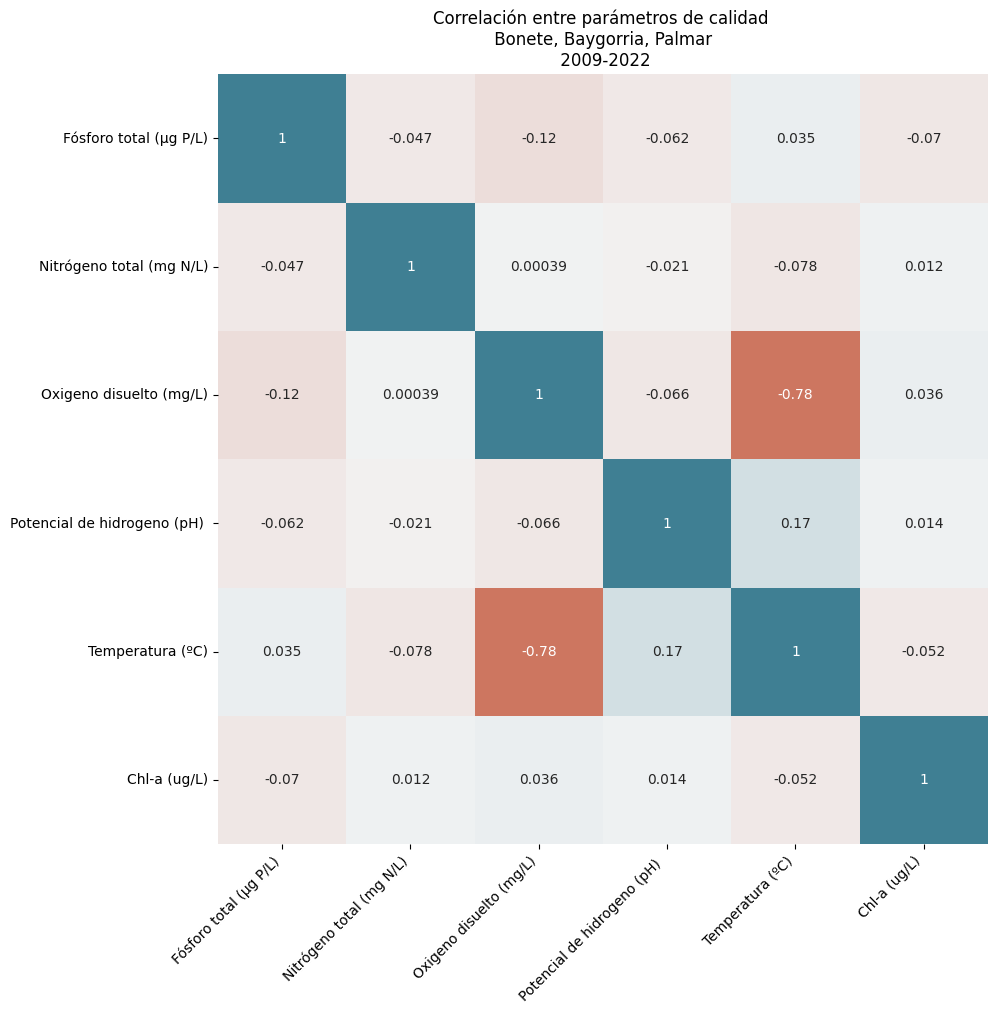

In [36]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

plt.title("Correlación entre parámetros de calidad \n Bonete, Baygorria, Palmar \n 2009-2022")
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

#Modelo de prediccion MLP


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
datos = pd.read_csv('Datos_Tesina_completo.csv')

In [ ]:
datos['Fecha']=pd.to_datetime(datos['Fecha'], format="%Y-%m-%d").dt.date
# set the Date column be the index of our dataset
datos= datos.set_index('Fecha')
# now check the data shape
datos.shape

In [ ]:
# Calcular la covarianza entre los parámetros
cov_matrix = datos.cov()
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Covarianza')
plt.show()

In [ ]:
datos.describe()

In [ ]:
datos = datos.sort_values(["Fecha"])

In [ ]:
datos

In [ ]:
def get_max_nse(history):
    validation = history.history["val_nse"]
    ymax = max(validation)
    return "Max NSE ≈ " + "%.6f" % ymax

def get_metrics(history):
    validation_rmse = history.history["val_rmse"]
    validation_nse = history.history["val_nse"]
    return min(validation_rmse), max(validation_nse)

def plot_history(history, title):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

  fig.suptitle(title)

  ax1.plot(history.history['nse'], label='train')
  ax1.plot(history.history['val_nse'], label='test')
  ax1.set_ylabel('nse')
  ax1.set_xlabel('epoch')

  ax2.plot(history.history['loss'], label='train')
  ax2.plot(history.history['val_loss'], label='test')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')

  ax1.text(
        0.97,
        0.97,
        get_max_nse(history),
        horizontalalignment="right",
        verticalalignment="top",
        transform=ax1.transAxes,
        fontsize=18,
    )
  plt.legend()
  plt.show()

In [ ]:
def score(y_true, y_pred):
	return 1 - (K.sum((y_pred -  K.mean(y_true))**2)/K.sum((y_true - K.mean(y_true))**2))

def rmse(y_true, y_pred):
	return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
# Considera como entrada los datos de calidad de agua de todas las estaciones para el tiempo t
x = scaler.fit_transform(datos[['Nitrógeno total (mg N/L)', 'Potencial de hidrogeno (pH) ', 'Temperatura (ºC)','Fósforo total (µg P/L)','Oxigeno disuelto (mg/L)', 'Chl-a (ug/L)']].values)

#y = x[:,1::2]
y = x[:,5]
date_split = pd.to_datetime(datetime.datetime(year=2018, month=4, day=17))
train_index = datos.loc[datos.index<date_split]

i = 1

## Remove o ultimo tempo do df de x e o primeiro do df de y
in_data = x[:-i]
out_data = y[i:]
#in_data = x[:-i]
#out_data = y[i:]

print(in_data.shape)
print(out_data.shape)

#Split train and test data
x_train_without_test = in_data[0:train_index.shape[0],]
y_train_without_test = out_data[0:train_index.shape[0],]

x_test = in_data[train_index.shape[0]:,]
y_test = out_data[train_index.shape[0]:,]

x_train, x_val, y_train, y_val = train_test_split(x_train_without_test, y_train_without_test, test_size=0.2, random_state=seed_number)

In [ ]:
input_dim = x_train.shape[1]

model = Sequential()

model.add(Dense(6,input_shape=(input_dim,),activation='tanh'))
model.add(Dense(1, activation='tanh'))

model.compile(optimizer='adam', loss="mean_squared_error" , metrics=[rmse, score]) ##"mean_squared_error"
model.summary()

history = model.fit(x_train, y_train, epochs=450, batch_size=65, validation_data=(x_val, y_val))

In [ ]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [ ]:
validation_rmse = history.history["val_rmse"]
min(validation_rmse)

In [ ]:
test_rmse = history.history["rmse"]
min(test_rmse)

In [ ]:
validation_score = history.history["val_score"]
max(validation_score)

In [ ]:
test_score = history.history["score"]
max(test_score)

In [ ]:
# print(get_metrics(history))
# plot_history(history, '(Entrada: Todos los Parametros de CA- Salida: Temperatura)')

In [ ]:
predict_values = model.predict(x_test)

predict_dataset = np.zeros(shape=(len(predict_values), 6))
predict_dataset[:,5] = predict_values.reshape(1,len(predict_values))
predict_dataset = scaler.inverse_transform(predict_dataset)
#predict_dataset=predict_dataset.reshape(len(predict_values), 38)

test_dataset = np.zeros(shape=(len(y_test), 6))
test_dataset[:,5] = y_test
test_dataset = scaler.inverse_transform(test_dataset)

print(predict_dataset.shape, test_dataset.shape)


n_size = 8
total_size = predict_dataset.shape[0]
print(total_size)

start = 1

fig, (ax1) = plt.subplots(1,1, figsize=(10, 6))
plt.plot(range(start,n_size+start), test_dataset[:,5][start:n_size+start], label='Observación', linewidth=8.0)
plt.plot(range(start,n_size+start), predict_dataset[:,5][start:(n_size+start)], label='Predicción', linewidth=3.0)
plt.legend(fontsize=17)
plt.tick_params(labelsize=16)
plt.suptitle('Valores predichos vs Valores observados de Clorofila-a', fontsize=17, family='serif', color='black', weight='bold')
ax1.set_ylabel('Chl-a (ug/L)', fontsize=17)
ax1.set_xlabel('Timestamp',fontsize=17)

plt.show()


fig2, (ax1) = plt.subplots(1,1, figsize=(10, 6))
plt.plot(range(total_size), test_dataset[:,5][:total_size], label='Observación', linewidth=3.0)
plt.plot(range(i,total_size+i), predict_dataset[:,5][:total_size], label='Predicción', linewidth=3.0)
plt.tick_params(labelsize=16)
plt.suptitle('Valores predichos vs Valores observados de Clorofila-a', fontsize=17)
ax1.set_ylabel('Chl-a (ug/L)', fontsize=17)
ax1.set_xlabel('Timestamp',fontsize=17)

plt.show()

In [ ]:
#Gráfico de dispersión de valores predichos y observados
plt.scatter(test_dataset[:,5] , predict_dataset[:,5], color='r', linewidth=2.0)
plt.xlabel('Observed values', fontsize=17, color='black')
plt.ylabel('Predict values', fontsize=17, color='black')

In [ ]:
from scipy import stats #regresión, modelos lineales, análisis de series de tiempo
x1 = test_dataset[:,5][:total_size]
y1 = predict_dataset[:,5][:total_size]
slope, intercept, r_value, p_value, std_err = stats.linregress(x1, y1)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

# plot
f2, ax2 = plt.subplots(figsize=(10,8))
plt.scatter(x1,y1)
plt.plot(x1, intercept + slope*x1, 'r', label='fitted line', markersize=12)
plt.legend()
plt.show()
corr = np.corrcoef(x1,y1)
corr = corr[0,1]
print('Correlación')
print(corr)

#Modelo de prediccion LSTM

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
datos = pd.read_csv('Datos_Tesina_completo.csv')

In [ ]:
datos = datos.sort_values(["Fecha"])

In [ ]:
datos

In [ ]:
def get_max_nse(history):
    validation = history.history["val_nse"]
    ymax = max(validation)
    return "Max NSE ≈ " + "%.6f" % ymax

def get_metrics(history):
    validation_rmse = history.history["val_rmse"]
    validation_nse = history.history["val_nse"]
    return min(validation_rmse), max(validation_nse)

def plot_history(history, title):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

  fig.suptitle(title)

  ax1.plot(history.history['nse'], label='train')
  ax1.plot(history.history['val_nse'], label='test')
  ax1.set_ylabel('nse')
  ax1.set_xlabel('epoch')

  ax2.plot(history.history['loss'], label='train')
  ax2.plot(history.history['val_loss'], label='test')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')

  ax1.text(
        0.97,
        0.97,
        get_max_nse(history),
        horizontalalignment="right",
        verticalalignment="top",
        transform=ax1.transAxes,
        fontsize=18,
    )
  plt.legend()
  plt.show()

In [ ]:
titles = [
          'Nitrógeno total (mg N/L)', 'Potencial de hidrogeno (pH)',
          'Temperatura (ºC)','Fósforo total (µg P/L)','Oxigeno disuelto (mg/L)', 'Chl-a (ug/L)'

]

feature_keys = [ 'Nitrógeno total (mg N/L)', 'Potencial de hidrogeno (pH)',
          'Temperatura (ºC)','Fósforo total (µg P/L)','Oxigeno disuelto (mg/L)', 'Chl-a (ug/L)'
]


colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown"
]

date_time_key = "Fecha"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=4, ncols=2, figsize=(12, 12), dpi=60, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - Embalse Baygorria ".format(titles[i], key),
            rot=15,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(datos)

In [ ]:
split_fraction = 0.70
train_split = int(split_fraction * int(datos.shape[0]))
step = 1

past = 6
future = 1
learning_rate = 0.1
batch_size = 350
epochs = 122


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std


In [ ]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 2, 3, 4, 5]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 2, 3, 4, 5]]
features = datos[selected_features]
features.index = datos[date_time_key]
features.head()

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

In [ ]:
train_data

In [ ]:
val_data

# Training dataset

The training dataset labels starts from the 7 observation (6 previously + 1 future).

In [ ]:
p=5 #Seleccione el Parametro a predecir
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(5)]].values #Parametros de entrenamiento de CA
y_train = features.iloc[start:end][[p]] #variable de entrenamiento a predecir

sequence_length = int(past / step)

In [ ]:
y_train

In [ ]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

## Validation dataset

The validation dataset must not contain the last 792 rows as we won't have label data for
those records, hence 792 must be subtracted from the end of the data.

The validation label dataset must start from 792 after train_split, hence we must add
past + future (792) to label_start.

In [ ]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(5)]].values
y_val = features.iloc[label_start:][[p]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

In [ ]:
def score(y_true, y_pred):
	return 1 - (K.sum((y_pred -  K.mean(y_true))**2)/K.sum((y_true - K.mean(y_true))**2))

def rmse(y_true, y_pred):
	return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

## Training

In [ ]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(6)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse" , metrics=[rmse, score])
model.summary()


In [ ]:

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)



modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    #validation_data=(x_val, y_val),
   validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

We can visualize the loss with the function below. After one point, the loss stops
decreasing.

In [ ]:
print(history)

In [ ]:

def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Entrenamiento loss")
    plt.plot(epochs, val_loss, "r", label="Validación loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Entrenamiento y Validación Loss")

## Prediction

The trained model above is now able to make predictions for 5 sets of values from
validation set.

In [ ]:

def show_plot(plot_data, delta, title):
    labels = ["Datos observados", "Futuro verdadero", "Predicción del Modelo"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 1) ])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(1):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        1,
        "Predicción de observación única",
    )

In [ ]:
validation_rmse = history.history["val_rmse"]
min(validation_rmse)

In [ ]:
test_rmse = history.history["rmse"]
min(test_rmse)

In [ ]:
validation_score = history.history["val_score"]
max(validation_score)

In [ ]:
test_score = history.history["score"]
max(test_score)

In [ ]:
x[:]

In [ ]:
y

In [ ]:
model.predict(x)[:]